### Proving Bayes theorem for uniform probability distribution

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

In [2]:
def circle(radius, coord):
    sq = ((radius**2)-(coord**2))**(1/2)
    return sq

In [3]:
def dist_from_origin(x_coord, y_coord):
    return ((x_coord**2) + (y_coord**2))**(1/2)

In [4]:
def area_of_circle(radius):
    return np.pi*radius*radius

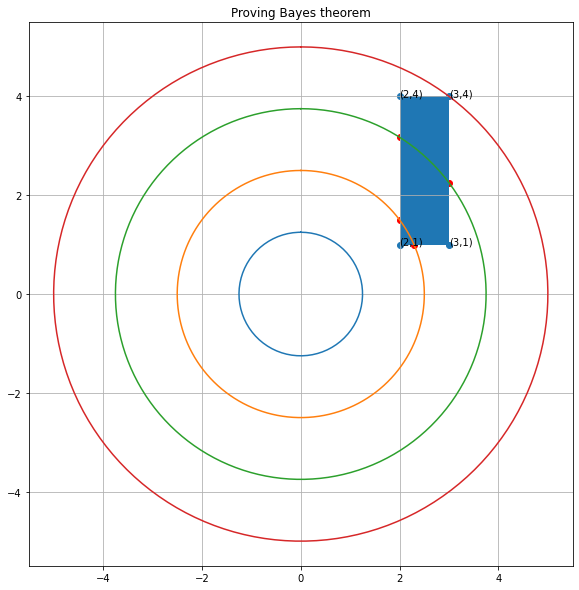

In [5]:
fig, ax = plt.subplots(1, figsize=(10, 10))
theta = np.linspace(0, 2*np.pi, 150)
a1 = 5*np.sin(theta)
b1 = 5*np.cos(theta)
a2 = (5/4)*np.sin(theta)
b2 = (5/4)*np.cos(theta)
a3 = (10/4)*np.sin(theta)
b3 = (10/4)*np.cos(theta)
a4 = (15/4)*np.sin(theta)
b4 = (15/4)*np.cos(theta)
x = 5/2
y = 5/2
ax.plot(a2,b2)
ax.plot(a3,b3)
ax.plot(a4,b4)
ax.plot(a1,b1)
ax.scatter([2,3,2,3],[1,1,4,4])
ax.scatter([2,circle((10/4), 1),2,3],[circle((10/4),2),1,circle((15/4),2), circle((15/4),3)], color='red')
ax.add_patch(Rectangle((x-0.5, y-1.5), 1, 3))
ax.set_title('Proving Bayes theorem')
plt.annotate("(2,1)", (2, 1))
plt.annotate("(3,1)", (3,1))
plt.annotate("(2,4)", (2, 4))
plt.annotate("(3,4)", (3,4))
ax.set_aspect(1)
ax.grid()

In [6]:
#Region of rectangle inside orange circle
def integrand(x, r):
    return ((r**2)-(x**2))**(1/2)
radius_1 = 10/4
area_1 = quad(integrand, 2, circle(radius_1,1), args=radius_1)[0] - (1*(circle(radius_1, 1)-2))

In [7]:
area_1

0.07930689727915374

In [8]:
#Region of rectangle within orange and green circles
radius_2 = (15/4)
area_2 = quad(integrand, 2, 3, args=radius_2)[0] - 1 - area_1

In [9]:
area_2

1.688260249733317

In [88]:
#Region of rectangle outside the green circle
radius_dummy = 5
area_dummy = quad(integrand, 2, 3, args=radius_dummy)[0] - 1 -3
area_dummy

0.31722758911661497

In [91]:
area_3 = quad(integrand, 2,3,args=radius_dummy)[0] - quad(integrand,2,3,args=radius_2)[0] - area_dummy
area_3

1.2324328529875292

In [92]:
area_1 + area_2 + area_3

3.0

In [98]:
#Probability of dart landing in rectangular region conventionally = (Area of rectangle)/(Area of circle)
p_convential = (3)/area_of_circle(5)

In [99]:
p_convential

0.03819718634205488

In [104]:
#Probability using Bayes theorem = P(A) = (P(A|C2)*P(C2)) + (P(A|C3)*P(C3)) + (P(A|C4)*P(C4))
#P_A denotes P(A), P_A_C2 denotes P(A|C2)
P_A_C2 = area_1/area_of_circle(10/4)
P_C2 = area_of_circle(10/4)/area_of_circle(5)
P_A_C3 = area_2/area_of_circle(15/4)
P_C3 = area_of_circle(15/4)/area_of_circle(5)
P_A_C4 = area_3/area_of_circle(5)
P_C4 = area_of_circle(5)/area_of_circle(5)
P_A = (P_A_C2*P_C2) + (P_A_C3*P_C3) + (P_A_C4*P_C4)
P_A

0.03819718634205488

### Proving Bayes theorem for normal probability distribution

In [169]:
#Convential probability = (integral(P(x)dA))/(Area of circle)
f_gaussian = lambda y, x: (np.exp(-((x**2)+(y**2))/2))/((2*np.pi)**(1/2))

In [170]:
P_actual = (integrate.dblquad(f_gaussian, 2, 3, lambda x: 1, lambda x: 4)[0])/area_of_circle(5)

In [171]:
P_actual

0.00010833937552192454

In [172]:
#Probability using Bayes theorem = P(A) = (P(A|C2)*P(C2)) + (P(A|C3)*P(C3)) + (P(A|C4)*P(C4))
#Finding P(A|C2)=integral(P(x)dA2)/P(C2) for dA2 inside orange circle(P(A|C2))
i_1 = (integrate.dblquad(f_gaussian, 2 , circle((10/4),1), lambda x:1, lambda x: circle((10/4), x))[0])/area_of_circle(10/4)

In [173]:
#P_A_C2 = P(A|C2)*P(C2)
P_A_C2 = i_1*area_of_circle(10/4)/area_of_circle(5)
P_A_C2

2.2273049758462882e-05

In [174]:
#Finding P(A|C3)=integral(P(x)dA3)/P(C3) for dA3 in between orange and green circles
i_2 = ((integrate.dblquad(f_gaussian,2,3,1,lambda x:circle((15/4),x))[0])-(i_1*area_of_circle(10/4)))/(area_of_circle(15/4))

In [175]:
#P_A_C3 = P(A|C3)*P(C3)
P_A_C3 = i_2*area_of_circle(15/4)/area_of_circle(5)
P_A_C3

8.461580459260622e-05

In [176]:
i_4 = (integrate.dblquad(f_gaussian,2,3, lambda x:4, circle(5,x))[0])

In [177]:
i_5 = (integrate.dblquad(f_gaussian,2,3, lambda x:1, circle(15/4,x))[0])

In [178]:
#Finding P(A|C4) = integral(P(x)dA4)/P(C4) for dA4 beyond green circle
i_3 = ((integrate.dblquad(f_gaussian,2,3, lambda x:1, lambda x:circle(5,x))[0])-i_4-i_5)/area_of_circle(5)

In [179]:
#P_A_C4 = P(A|C4)*P(C4)
P_A_C4 = i_3*(area_of_circle(5)/area_of_circle(5))

In [180]:
#P(A) = P_A_C2 + P_A_C3 + P_A_C4
P_A_C2 + P_A_C3 + P_A_C4

0.0001086400280503953